<a href="https://colab.research.google.com/github/hariharan7070/-stock-price-forecasting-lstm/blob/master/stock_price_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance pandas numpy matplotlib scikit-learn tensorflow

/tmp/ipython-input-2-523133689.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0175
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0012
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0011
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0010
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 7.8919e-04
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 9.9694e-04
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 8.2293e-04
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 8.2371e-04
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 8.3552e-04
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 7.1182e-04
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
Root Mean Squared Error: 11.468046155689303


/tmp/ipython-input-2-523133689.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


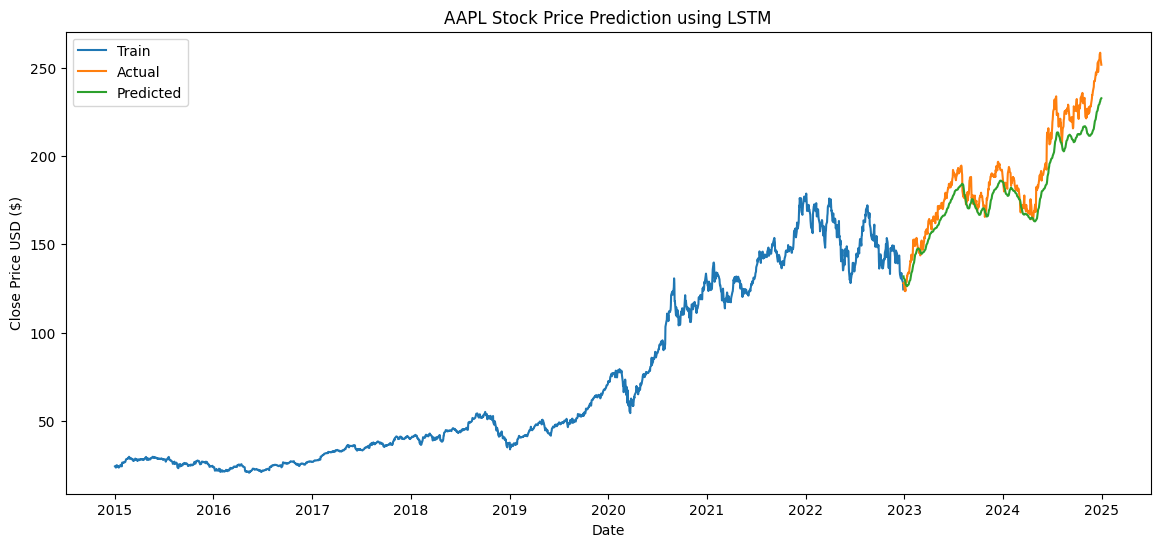

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import math

ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2024-12-31")
data = data[['Close']]
data.dropna(inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - 60:]

def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

rmse = math.sqrt(mean_squared_error(y_test_scaled, predictions))
print("Root Mean Squared Error:", rmse)

train = data[:train_size]
valid = data[train_size:]
valid['Predictions'] = predictions

plt.figure(figsize=(14, 6))
plt.title('AAPL Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'], label='Train')
plt.plot(valid['Close'], label='Actual')
plt.plot(valid['Predictions'], label='Predicted')
plt.legend()
plt.show()
